## **Submitted By:**
## **Adhip Bhattarai - THA076BCT004**
## **Bishal Rijal - THA076BCT014**

## **Import Necessary Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer


## **Read Image**

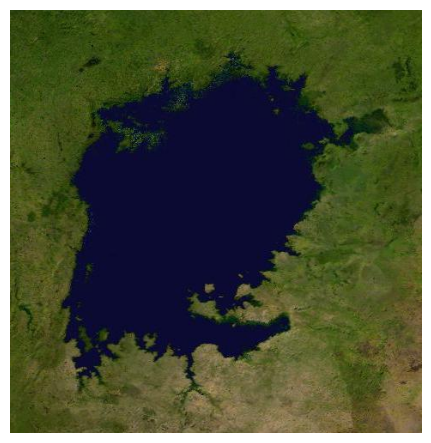

In [ ]:
# Read the image using cv2
img_path = 'MicrosoftTeams-image.png'
img = cv2.imread(img_path)

# Convert BGR image to RGB (matplotlib uses RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()



In [ ]:
img_rgb.shape #Image shape

(494, 480, 3)

In [ ]:
original_shape = img.shape
# Reshape the image to a 2D array while preserving the number of channels
reshaped_img = img_rgb.reshape(-1, 3)




In [ ]:
reshaped_img.shape #Reshaped image shape

(237120, 3)

## **KMeans model with 3 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)

In [ ]:
kmeans.fit(reshaped_img) #Train KMeans model

KMeans(n_clusters=3, n_init=10, random_state=42)

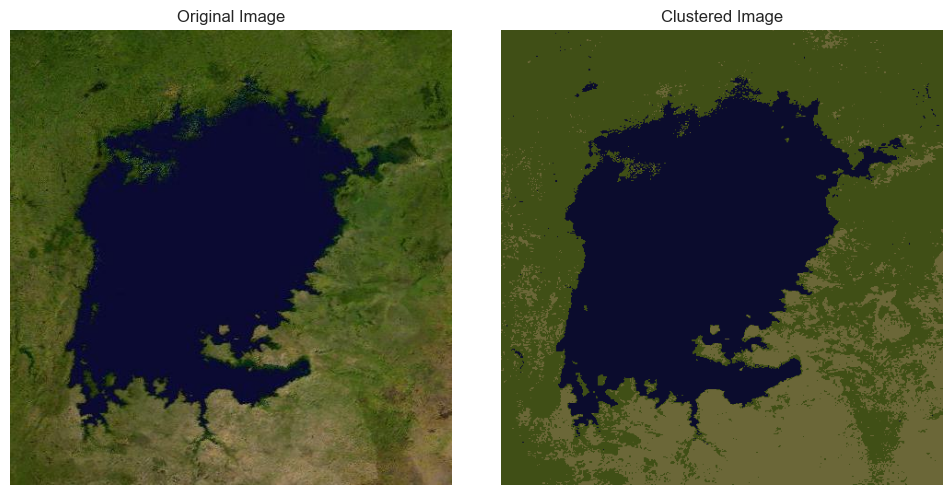

In [ ]:
cluster_centroids = kmeans.cluster_centers_

# Convert cluster centroids to integers
cluster_centroids = np.uint8(cluster_centroids)
# Create an image with the cluster centroids
clustered_img = cluster_centroids[kmeans.labels_]

# Reshape the clustered image back to its original shape
clustered_img = clustered_img.reshape(img_rgb.shape)

# Display the original image and the clustered image using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clustered_img)
plt.title('Clustered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
cluster_centroids

array([[ 64,  79,  22],
       [ 11,  12,  45],
       [107, 103,  56]], dtype=uint8)

## **Show Clustered Image**

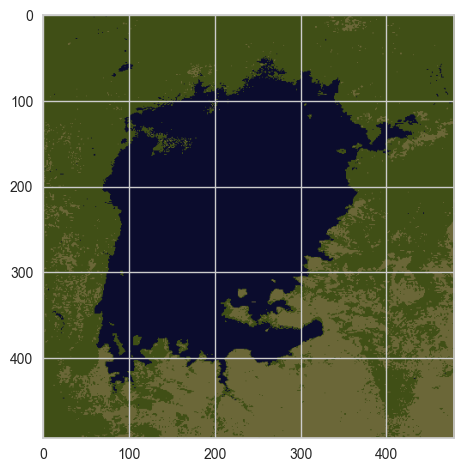

In [ ]:
c=np.uint8(kmeans.cluster_centers_)
seg_img = c[kmeans.labels_]
seg_img2 = seg_img.reshape((img.shape))
plt.imshow(seg_img2)

In [ ]:
labels = kmeans.labels_

# Count the number of pixels in each cluster
cluster_counts = np.bincount(labels, minlength=3)

# Calculate the percentage of pixels in each cluster
total_pixels = labels.shape[0]
cluster_percentages = (cluster_counts / total_pixels) * 100

# Print the cluster percentages
for cluster_idx, percentage in enumerate(cluster_percentages):
    print(f"Cluster {cluster_idx}: {percentage:.2f}%")

Cluster 0: 46.77%
Cluster 1: 32.59%
Cluster 2: 20.64%


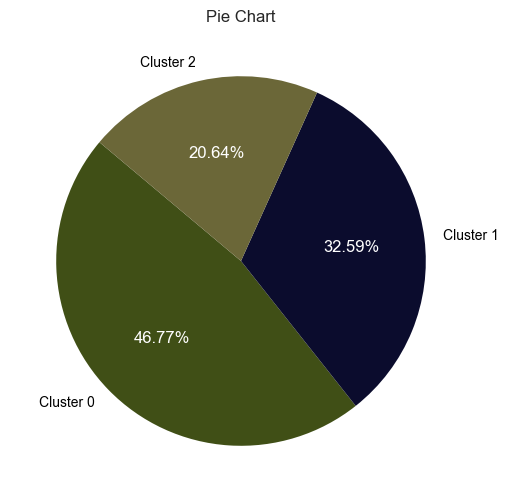

In [ ]:

plt.figure(figsize=(6, 6))
cluster_colors = kmeans.cluster_centers_.astype(int)

# Create the pie chart
pie = plt.pie(cluster_percentages, labels=[f'Cluster {i}' for i in range(3)], colors=cluster_colors / 255,
              autopct='%1.2f%%', startangle=140)

# Set the text color inside the pie chart to blue
for text in pie[1]:
    text.set_color('black')

# Set the text color outside the pie chart to black
plt.setp(pie[2], color='white')

# Set the title
plt.title('Pie Chart')

# Display the pie chart
plt.show()


In [ ]:
cluster_counts #Total number of pixels in each clusters

array([110905,  77278,  48937], dtype=int64)

In [ ]:
#Create DataFrame containing RGB values and total pixels of each clusters
data = {
        'Red': cluster_centroids[:, 0],
        'Green': cluster_centroids[:, 1],
        'Blue': cluster_centroids[:, 2],
        'Total_counts': cluster_counts}
df = pd.DataFrame(data)
df



,Red,Green,Blue,Total_counts
0,64,79,22,110905
1,11,12,45,77278
2,107,103,56,48937


In [ ]:
# Calculate lake area using the previous Dataframe
lake_area = (df.loc[1, 'Total_counts'] / df['Total_counts'].sum()) * 200000
lake_area

65180.49932523616

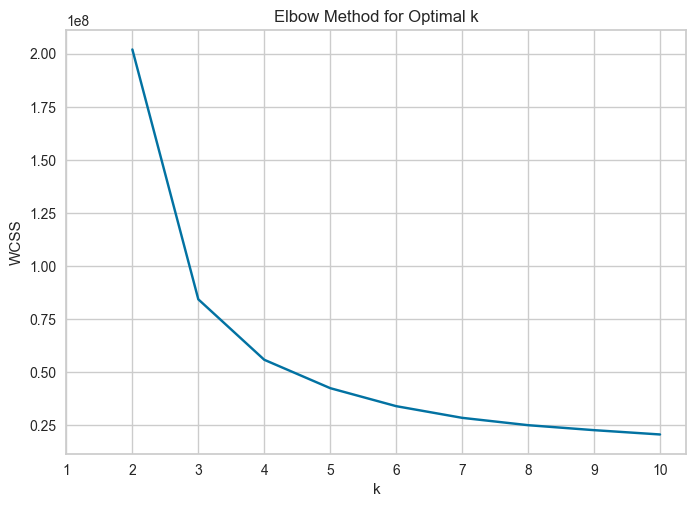

In [ ]:


# Define KMeans algorithm initialization parameters
kmeans_kwargs = {
    "init": "random",        # Initialization method for centroids
    "n_init": 10,            # Number of time the k-means algorithm will be run with different centroid seeds
    "random_state": 42,      # Random seed for reproducibility
}

# Initialize an empty list to store the sum of squared distances for each k value
sse = []

# Loop through different values of k (number of clusters)
for k in range(2, 11):
    # Create a KMeans model with the current k value and specified initialization parameters
    model = KMeans(n_clusters=k, **kmeans_kwargs)

    # Fit the KMeans model to the reshaped image data
    model.fit(reshaped_img)

    # Append the inertia (sum of squared distances) of the fitted model to the list
    sse.append(model.inertia_)

# Plot the Elbow curve to determine the optimal number of clusters (k)
plt.plot(range(2, 11), sse)
plt.xticks(range(1, 11))     # Set x-axis ticks to match the range of k values
plt.xlabel("k")             # Label for x-axis
plt.ylabel("WCSS")          # Label for y-axis
plt.title("Elbow Method for Optimal k")  # Title for the plot
plt.show()                 # Display the plot


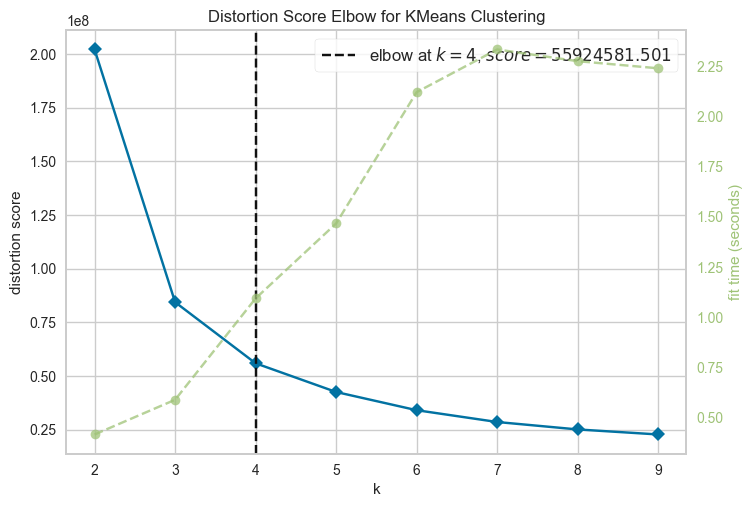

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Create a KElbowVisualizer instance with the KMeans model and specify the range of k values
visualizer = KElbowVisualizer(model, k=(2, 10))

# Fit the visualizer to the reshaped image data
visualizer.fit(reshaped_img)

# Display the elbow visualization
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.6895546114519658
For n_clusters = 3 The average silhouette_score is : 0.6463363467170485
For n_clusters = 4 The average silhouette_score is : 0.5728389709569488
For n_clusters = 5 The average silhouette_score is : 0.5556914900234113
For n_clusters = 6 The average silhouette_score is : 0.535214860837284


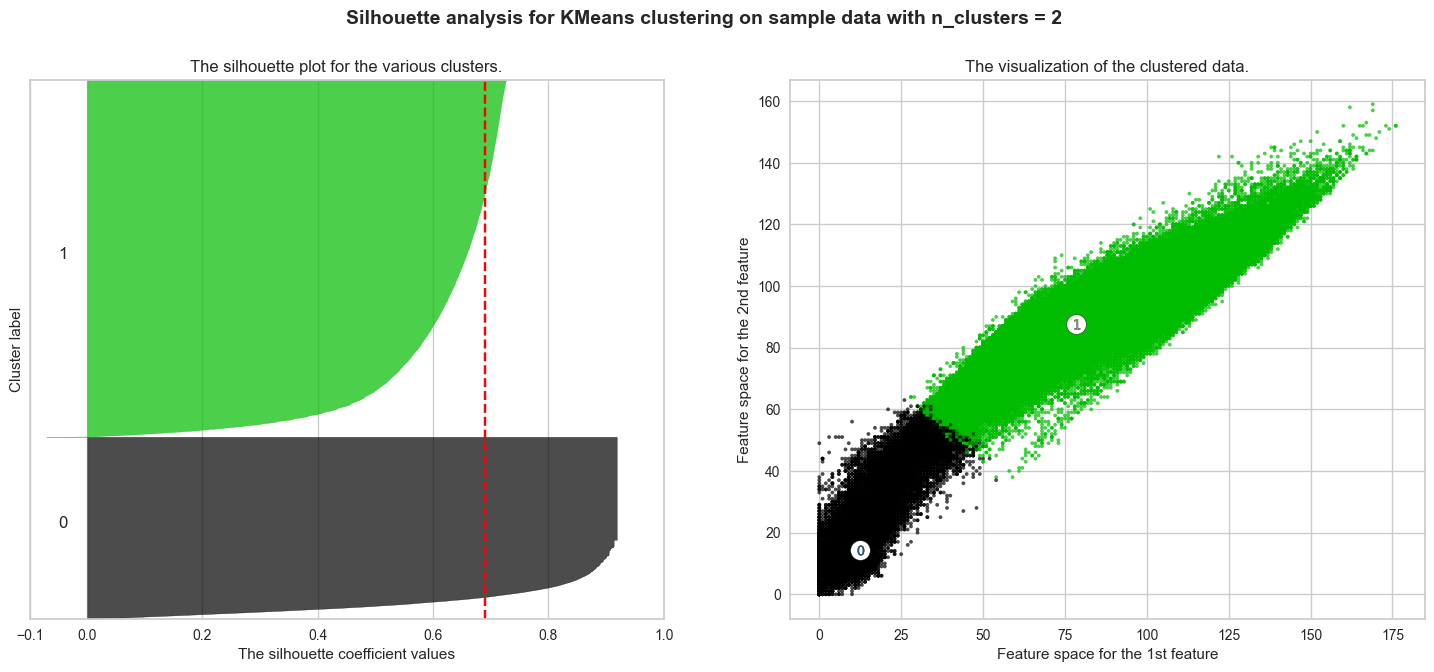

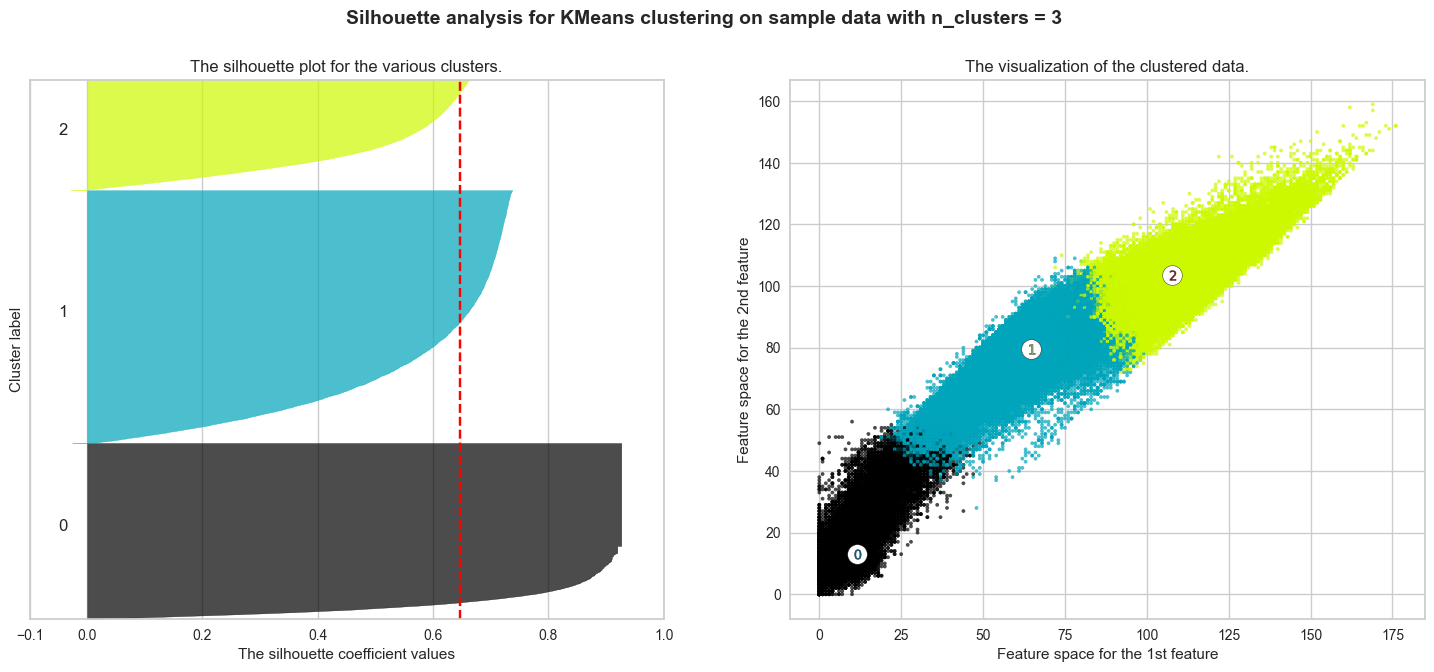

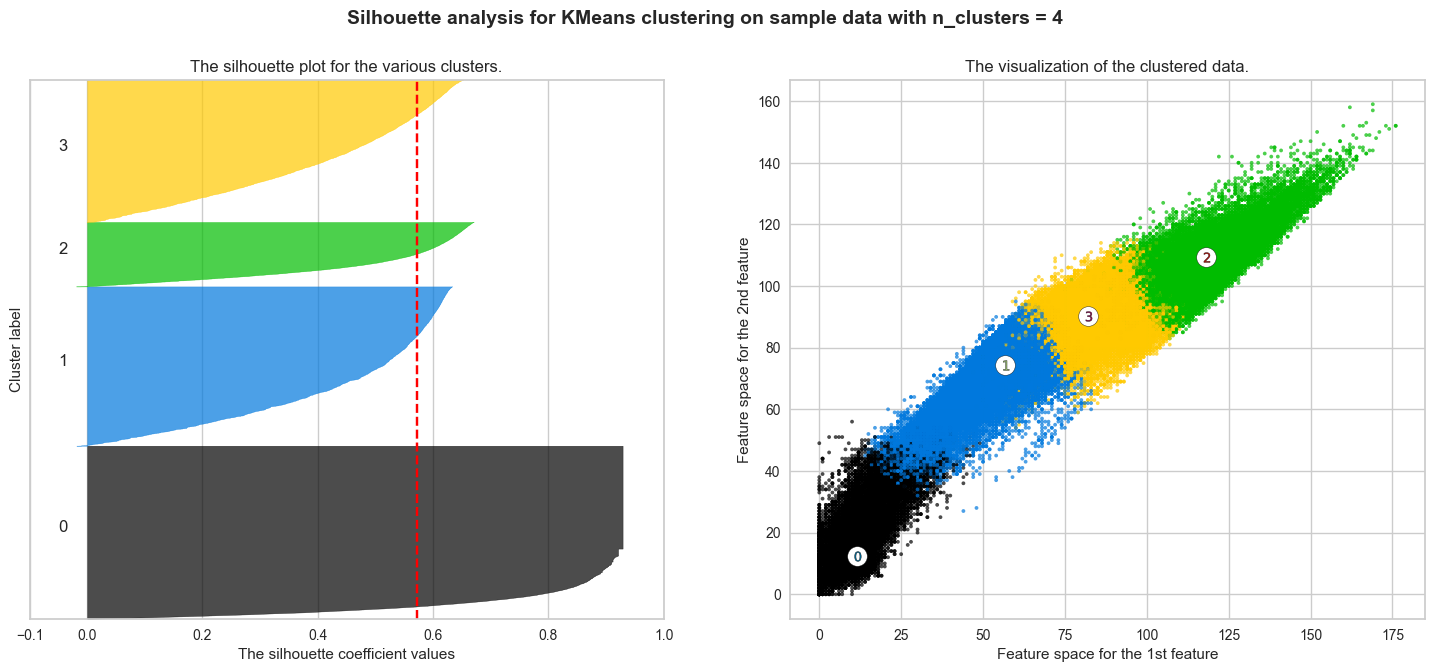

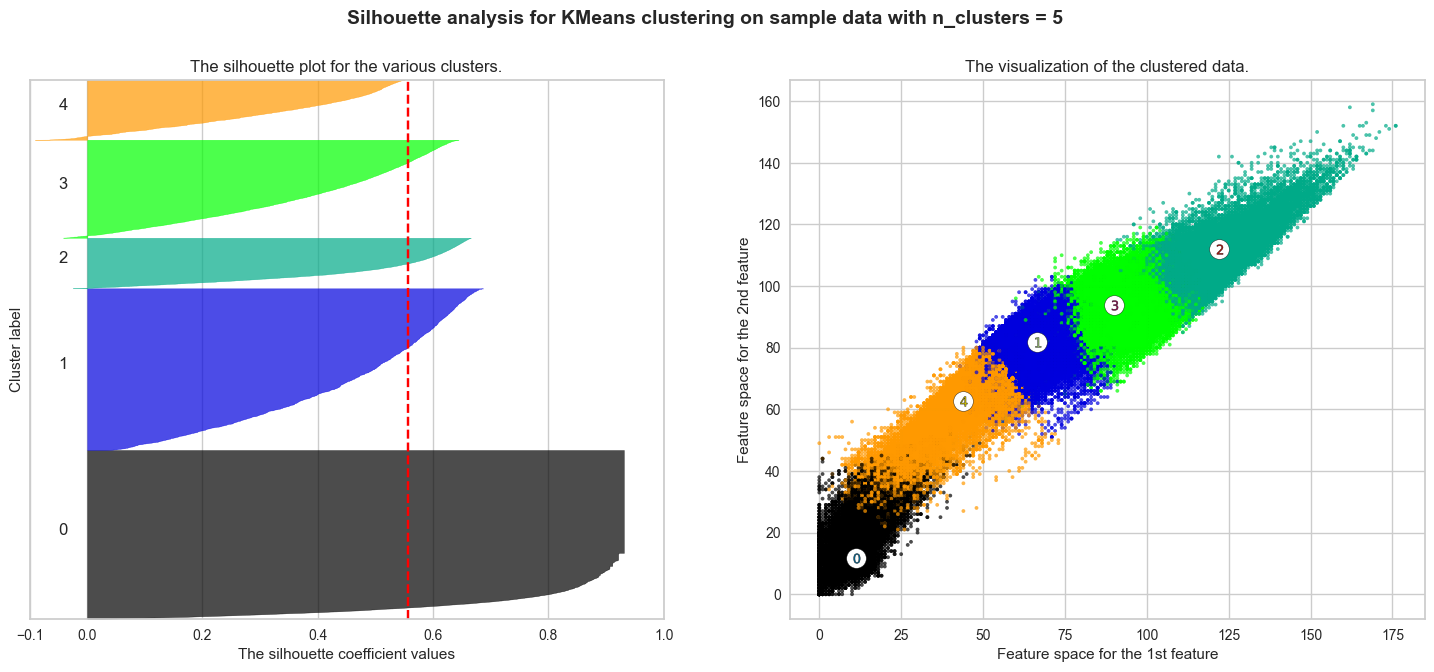

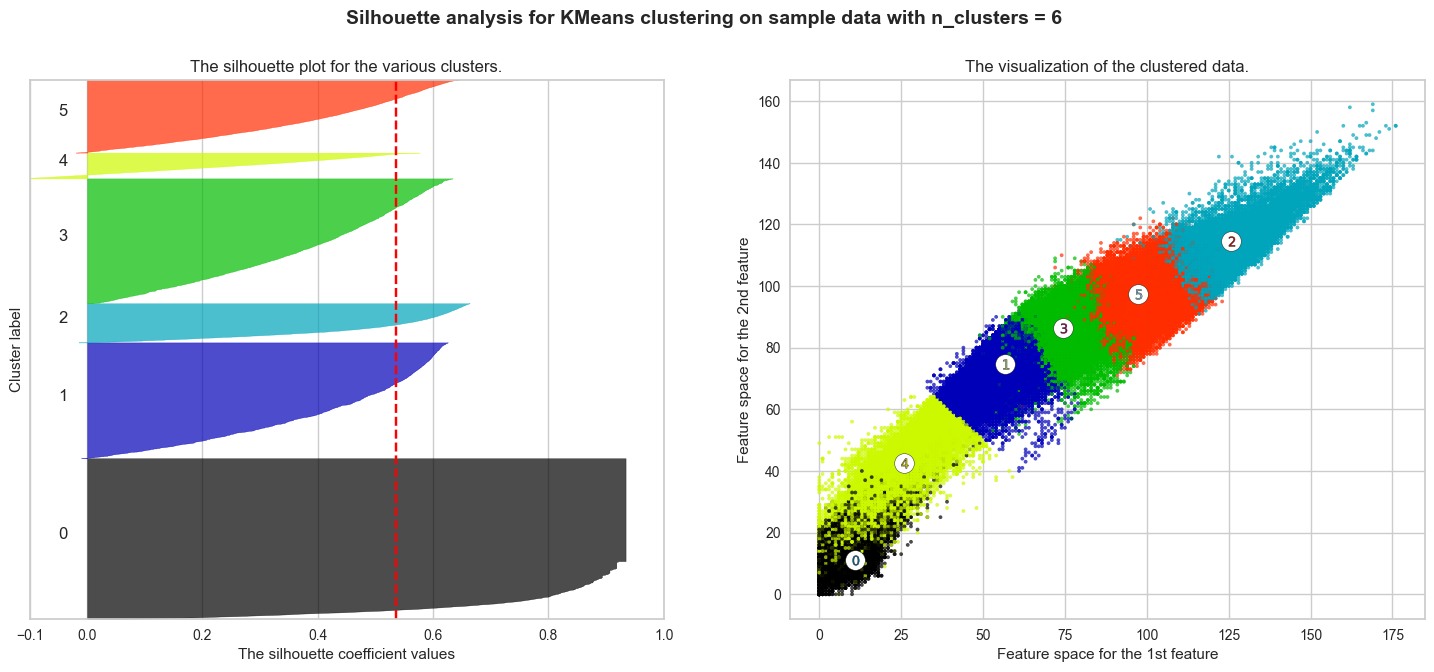

In [ ]:

X = reshaped_img
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## **KMeans with 4 clusters**

In [ ]:
kmeans_new = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

In [ ]:
kmeans_new.fit(reshaped_img) #Train the new Kmeans model

KMeans(n_clusters=4, n_init=10, random_state=42)

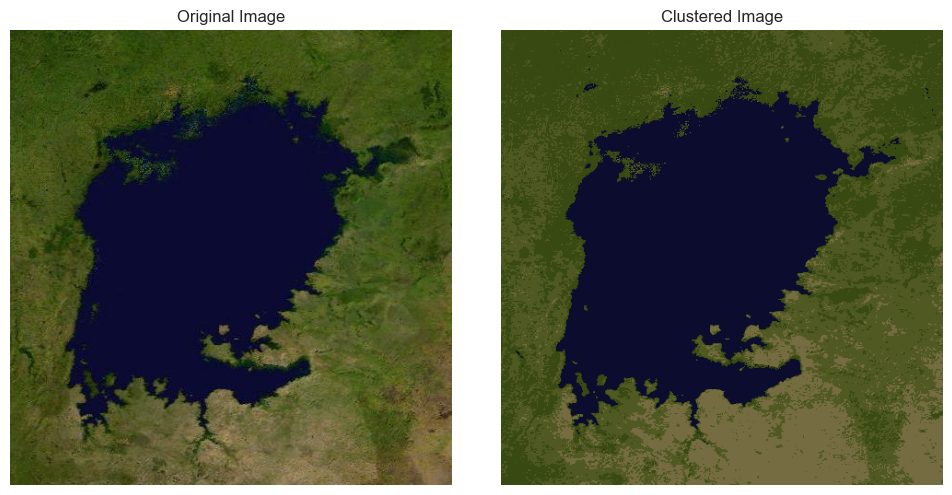

In [ ]:
new_centroids = kmeans_new.cluster_centers_

# Convert new centroids to integers
new_centroids = np.uint8(new_centroids)

# Create an image with the new cluster centroids
new_clustered_img = new_centroids[kmeans_new.labels_]

# Reshape the new clustered image back to its original shape
reshaped_new_clustered_img = new_clustered_img.reshape(img_rgb.shape)

# Display the original image and the new clustered image using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reshaped_new_clustered_img)
plt.title('Clustered Image')
plt.axis('off')

plt.tight_layout()
plt.show()



## **Display Clustered Image**

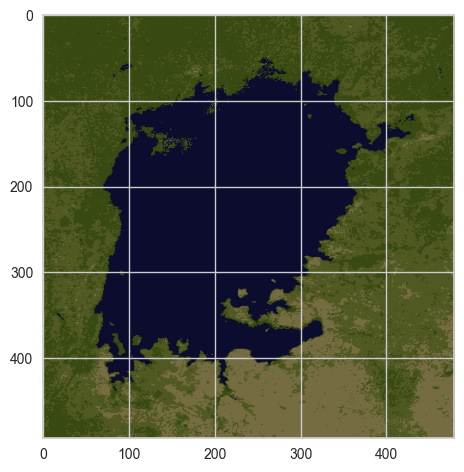

In [ ]:
center = np.uint8(kmeans_new.cluster_centers_)
seg_image = center[kmeans_new.labels_]
seg_image2 = seg_image.reshape(img.shape)
plt.imshow(seg_image2)

In [ ]:
labels_new = kmeans_new.labels_

# Count the number of pixels in each cluster
cluster_counts_new = np.bincount(labels_new, minlength=4)

# Calculate the percentage of pixels in each cluster
total_pixels_new = labels_new.shape[0]
cluster_percentages_new = (cluster_counts_new / total_pixels_new) * 100

# Print the cluster percentages
for cluster_idx, percentage in enumerate(cluster_percentages_new):
    print(f"Cluster {cluster_idx}: {percentage:.2f}%")

Cluster 0: 27.06%
Cluster 1: 32.06%
Cluster 2: 12.31%
Cluster 3: 28.57%


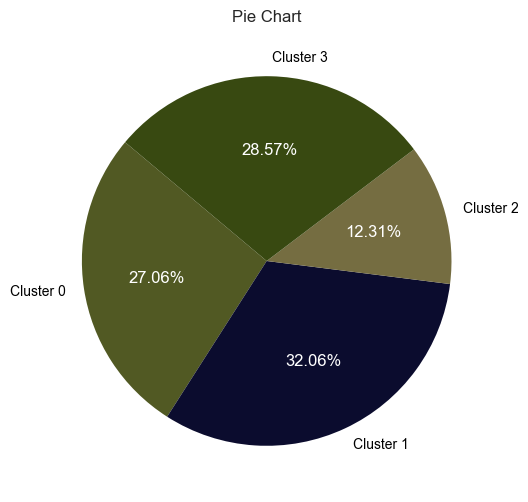

In [ ]:

plt.figure(figsize=(6, 6))
cluster_colors_new = kmeans_new.cluster_centers_.astype(int)

# Create the pie chart
pie = plt.pie(cluster_percentages_new, labels=[f'Cluster {i}' for i in range(4)], colors=cluster_colors_new / 255,
              autopct='%1.2f%%', startangle=140)

# Set the text color inside the pie chart to blue
for text in pie[1]:
    text.set_color('black')

# Set the text color outside the pie chart to black
plt.setp(pie[2], color='white')

# Set the title
plt.title('Pie Chart')

# Display the pie chart
plt.show()


In [ ]:
cluster_counts_new #Contains total number of pixels in each clusters

array([64162, 76025, 29197, 67736], dtype=int64)

In [ ]:
#Dataframe containing RGB values and total number of pixels of each cluster
data_new = {
        'Red': new_centroids[:, 0],
        'Green': new_centroids[:, 1],
        'Blue': new_centroids[:, 2],
        'Total_counts': cluster_counts_new}
df_new = pd.DataFrame(data_new)
df_new



,Red,Green,Blue,Total_counts
0,81,89,35,64162
1,11,12,46,76025
2,117,109,65,29197
3,56,73,17,67736


In [ ]:
lake_area_new = (df_new.loc[1, 'Total_counts'] / df_new['Total_counts'].sum()) * 200000
lake_area_new

64123.65047233468